In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("ANALYST.csv")
df.head()

,Unnamed: 0,Nombre de trabajo,Compania,Salario,Categoria,Subcategoria,Localidad,Activo desde,Jornada,Tipo de contrato
0,0,Se necesita personal de 17 a 35 años,EMPLEOS EN GUAYAQUIL,"$ 500,00 (Mensual)",Almacenamiento / Logística / Distribución,Oficios y Profesiones,Guayaquil,16/08/2020 - 14:32:54 pm,Tiempo completo,Contrato a Plazo Indeterminado
1,1,Auxiliar de bodega,PARTESCAT,"500,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Quito,16/08/2020 - 12:46:40 pm,Tiempo Completo,Otro tipo de contrato
2,2,Chofer y oficial,Pluproxsa S.A.,"406,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Logística y Distribución,Guayaquil,16/08/2020 - 12:46:36 pm,Tiempo Completo,Contrato por tiempo indefinido
3,3,Mecánico Motocicletas,MULTIMOTOS S. A.,"394,00 US$ (Neto mensual)",Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Portoviejo,16/08/2020 - 12:25:27 pm,Tiempo Completo,Contrato por tiempo indefinido
4,4,Mecánico,CONFIDENCIAL,A convenir,Almacenamiento / Logística / Distribución,Mantenimiento y Reparaciones,Manta,16/08/2020 - 12:25:22 pm,Tiempo Completo,Contrato por tiempo indefinido


### Limpiando datos

In [9]:
df['Salario'] = df['Salario'].str.rstrip(' US$ (Neto mensual)')
df['Salario'] = df['Salario'].str.lstrip('$ ')
df['Salario'] = df['Salario'].str.replace(',00', '')
df['Salario'] = df['Salario'].str.rstrip(' US$ (M')
df['Salario'] = df['Salario'].str.replace('.','')

In [10]:
df = df.drop(['Unnamed: 0'], axis=1)

In [12]:
df2 = df

### Codificando

In [13]:
labels1, uniques1 = pd.factorize(df2['Jornada'])
df2['Code_jornada'] = labels1

In [16]:
labels2, uniques2 = pd.factorize(df2['Tipo de contrato'])
df2['Code_contrato'] = labels2

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Nombre de trabajo  907 non-null    object
 1   Compania           907 non-null    object
 2   Salario            907 non-null    object
 3   Categoria          907 non-null    object
 4   Subcategoria       907 non-null    object
 5   Localidad          907 non-null    object
 6   Activo desde       907 non-null    object
 7   Jornada            907 non-null    object
 8   Tipo de contrato   907 non-null    object
 9   Code_jornada       907 non-null    int64 
 10  Code_contrato      907 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 78.1+ KB


In [31]:
df2['Jornada'].unique()

array(['Tiempo completo', 'Tiempo Completo', 'Medio Tiempo', 'Por Horas',
       'Desde casa', 'Desde Casa', 'Beca/Prácticas', 'Tiempo parcial',
       'Por horas'], dtype=object)

In [32]:
df2['Code_jornada'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [33]:
df2['Tipo de contrato'].unique()

array(['Contrato a Plazo Indeterminado', 'Otro tipo de contrato',
       'Contrato por tiempo indefinido',
       'Contrato por tiempo determinado', 'Contrato de Temporada',
       'Contrato Intermitente', 'Contrato de obra o labor',
       'Contrato por Necesidades del Mercado',
       'Contrato por Inicio o Incremento de Actividad',
       'Contrato Freelance', 'Sin especificar', 'Contrato de Aprendizaje'],
      dtype=object)

In [34]:
df2['Code_contrato'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

### Clustering

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [21]:
X = df2.iloc[:, [9,10]].values
wcss = []

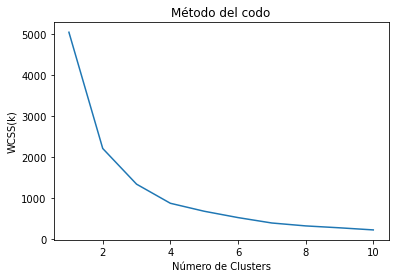

In [22]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

In [23]:
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

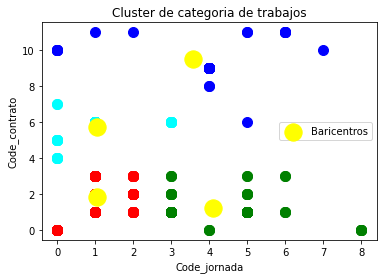

In [24]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "red", label = "")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "blue")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "green")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = "cyan")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = "yellow", label = "Baricentros")
plt.title("Cluster de categoria de trabajos")
plt.xlabel("Code_jornada")
plt.ylabel("Code_contrato")
plt.legend()
plt.show()